#Classification and Regression


In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data,test_targets) = (boston_housing.load_data())

57026/57026 [==============================] - 0s 0us/step


In [2]:
#Normalize data

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /=std

In [4]:
#Model Definition
import keras
from keras import layers


def build_model():
  model = keras.Sequential([
      layers.Dense(64,activation='relu'),
      layers.Dense(64,activation='relu'),
      layers.Dense(1)
  ])

  model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
  return model

##K-Fold validation
Split the available data into K paritions, instantiating K identical models and training each one on K-1 partitions while evaluating on the remaining one. Validation score is the average of the K validation scores obtained.

In [6]:
#K-fold
import numpy as np

k = 4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []

for i in range(k):
  print(f'Processing fold #{i}')
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data,val_targets, verbose=0)
  all_scores.append(val_mae)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [7]:
print(all_scores)
print(np.mean(all_scores))

[1.9730364084243774, 2.483109474182129, 2.539334774017334, 2.390798568725586]
2.3465698063373566


In [11]:
#Save the validation logs at each fold
num_epochs = 500
all_mae_history = []

for i in range(k):
  print(f'Processing fold #{i}')
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data,val_targets), epochs=num_epochs, batch_size=16, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_history.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [12]:
average_mae_history = [np.mean([x[i] for x in all_mae_history])for i in range(num_epochs)]

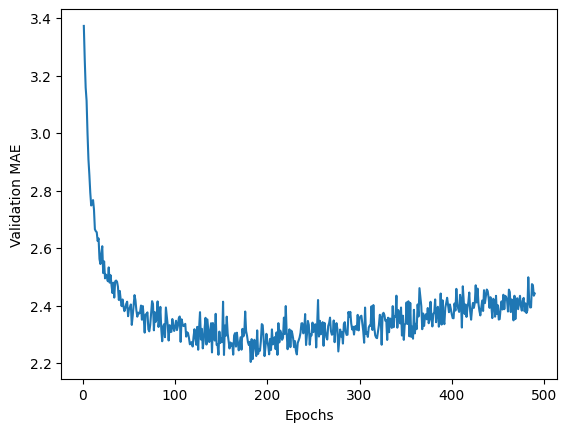

In [14]:
#Plot validation scores
import matplotlib.pyplot as plt
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1,len(truncated_mae_history)+1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [16]:
#Train Final Model

model = build_model()
model.fit(train_data, train_targets, epochs=130, batch_size = 16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 15.7897 - mae: 2.5319
2.5319321155548096
